In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd



from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
import time
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# Laddar in data

In [5]:
# Ladda in filen med rätt separator
car_price_dataset_original = pd.read_csv('car_price_dataset.csv', sep=';')

# kolla information om DataFrame för att bekräfta kolumnerna
car_price_dataset_original.info()

# Och titta på de första raderna för att se att kolumnerna är uppdelade
car_price_dataset_original.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         10000 non-null  object 
 1   Model         10000 non-null  object 
 2   Year          10000 non-null  int64  
 3   Engine_Size   10000 non-null  float64
 4   Fuel_Type     10000 non-null  object 
 5   Transmission  10000 non-null  object 
 6   Mileage       10000 non-null  int64  
 7   Doors         10000 non-null  int64  
 8   Owner_Count   10000 non-null  int64  
 9   Price         10000 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 781.4+ KB


,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867


In [6]:
print(car_price_dataset_original['Brand'].value_counts())
print()
print(car_price_dataset_original['Model'].value_counts())
print()
print(car_price_dataset_original['Fuel_Type'].value_counts())
print()
print(car_price_dataset_original['Transmission'].value_counts())

Brand
Ford          1048
Audi          1038
Volkswagen    1020
Honda         1009
Chevrolet     1003
BMW            999
Hyundai        995
Kia            976
Toyota         970
Mercedes       942
Name: count, dtype: int64

Model
Accord      365
Fiesta      363
Impala      355
5 Series    353
Tiguan      352
Focus       351
Q5          350
A4          350
Elantra     347
Golf        339
A3          338
Optima      336
Civic       336
3 Series    335
Explorer    334
Malibu      333
Passat      329
Tucson      329
Rio         327
Corolla     325
RAV4        324
Camry       321
E-Class     321
Sonata      319
Equinox     315
GLA         315
Sportage    313
X5          311
CR-V        308
C-Class     306
Name: count, dtype: int64

Fuel_Type
Electric    2625
Diesel      2512
Hybrid      2453
Petrol      2410
Name: count, dtype: int64

Transmission
Manual            3372
Automatic         3317
Semi-Automatic    3311
Name: count, dtype: int64


In [7]:
# Antal olika modeller i Model
print(f"Antal olika modeller: {car_price_dataset_original['Model'].nunique()}")

Antal olika modeller: 30


In [8]:
# Gör en kopia av originaldatasetet för att arbeta med
car_price_dataset = car_price_dataset_original.copy()

In [9]:
#Kolla så att kopian ser bra ut
car_price_dataset.head()

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867


# EDA och databearbetning


In [10]:
# använder get.dummies för att konvertera kategoriska variabler (object) till numeriska

# Vi gör encoding på alla kategoriska kolumner, inklusive Model
car_price_dataset = pd.get_dummies(
    car_price_dataset, 
    columns=['Brand', 'Model', 'Fuel_Type', 'Transmission'],
    drop_first=True, # Rekommenderas för att undvika redundans i datan
    dtype=int, prefix ='dmy'
)

# Kolla hur många kolumner du har nu
print(f"Datasetet har nu {car_price_dataset.shape[1]} kolumner.")

Datasetet har nu 49 kolumner.


In [11]:
#skapa tränings- och validerings- och testdata. tar 80
train_full, test = train_test_split(car_price_dataset, test_size=0.2, random_state=40)
train, val = train_test_split(train_full, test_size=0.25, random_state=36) # 0.25 x 0.8 = 0.2

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6000 entries, 4784 to 6766
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                6000 non-null   int64  
 1   Engine_Size         6000 non-null   float64
 2   Mileage             6000 non-null   int64  
 3   Doors               6000 non-null   int64  
 4   Owner_Count         6000 non-null   int64  
 5   Price               6000 non-null   int64  
 6   dmy_BMW             6000 non-null   int64  
 7   dmy_Chevrolet       6000 non-null   int64  
 8   dmy_Ford            6000 non-null   int64  
 9   dmy_Honda           6000 non-null   int64  
 10  dmy_Hyundai         6000 non-null   int64  
 11  dmy_Kia             6000 non-null   int64  
 12  dmy_Mercedes        6000 non-null   int64  
 13  dmy_Toyota          6000 non-null   int64  
 14  dmy_Volkswagen      6000 non-null   int64  
 15  dmy_5 Series        6000 non-null   int64  
 16  dmy_A3  

In [13]:
#Korrelationsmatrisen för att se vilka funktioner som är mest relaterade till priset
# Det som är närmast 1 har närmast positiv korrelation med priset
corr_matrix = train.corr()
corr_matrix["Price"].sort_values(ascending=False)

Price                 1.000000
Year                  0.650406
Engine_Size           0.364180
dmy_Electric          0.229664
dmy_Hybrid            0.033632
dmy_Equinox           0.030515
dmy_Mercedes          0.019744
dmy_Chevrolet         0.018366
dmy_C-Class           0.016793
dmy_Corolla           0.016465
dmy_Optima            0.015545
dmy_Kia               0.013737
dmy_Impala            0.013144
dmy_Sportage          0.012681
dmy_Tiguan            0.012265
dmy_GLA               0.010419
dmy_Q5                0.008124
dmy_Fiesta            0.007234
dmy_E-Class           0.006199
dmy_A4                0.003932
dmy_Ford              0.003494
dmy_Volkswagen        0.002996
dmy_Focus             0.002336
dmy_Passat           -0.002687
dmy_A3               -0.003445
dmy_CR-V             -0.003857
dmy_Tucson           -0.003959
dmy_Explorer         -0.003982
dmy_Golf             -0.004729
dmy_Rio              -0.004951
dmy_Toyota           -0.006363
dmy_5 Series         -0.006841
Doors   

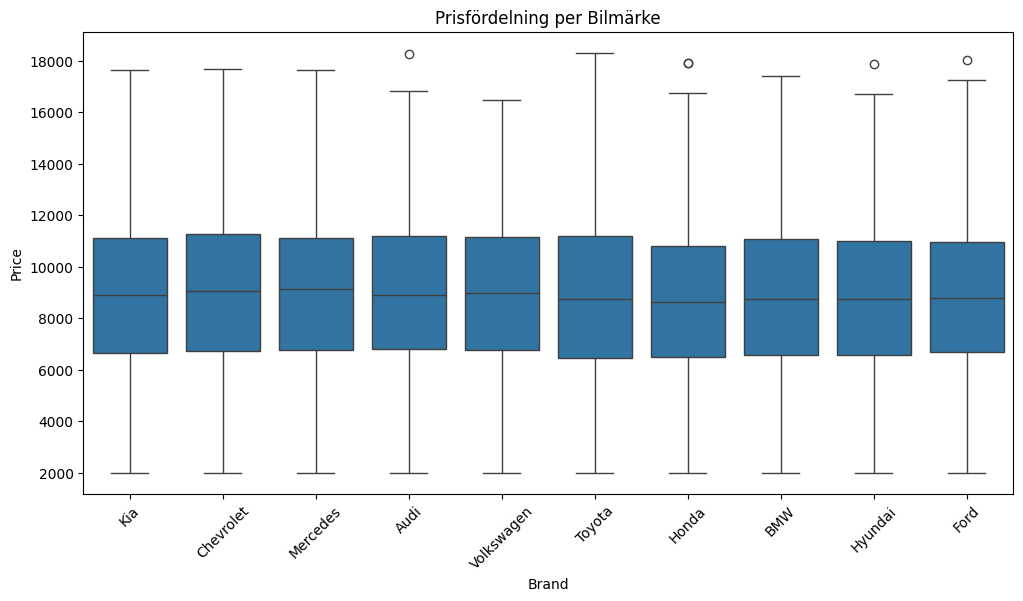

In [14]:
plt.figure(figsize=(12, 6))
# Vi använder originaldatasetet här för att ha kvar textnamnen på märkena
sns.boxplot(x='Brand', y='Price', data=car_price_dataset_original)
plt.xticks(rotation=45)
plt.title('Prisfördelning per Bilmärke')
plt.show()

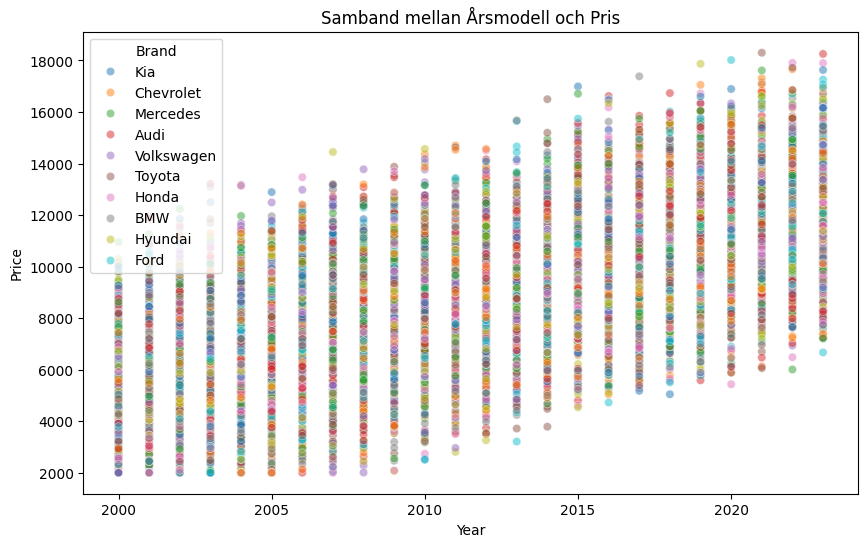

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Year', y='Price', hue='Brand', data=car_price_dataset_original, alpha=0.5)
plt.title('Samband mellan Årsmodell och Pris')
plt.show()

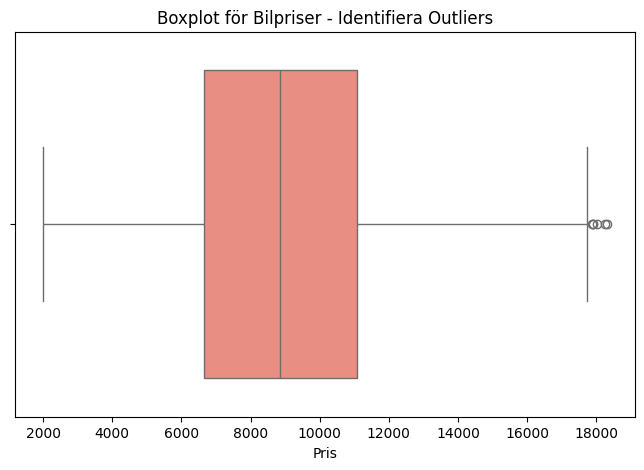

In [16]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=car_price_dataset_original['Price'], color='salmon')
plt.title('Boxplot för Bilpriser - Identifiera Outliers')
plt.xlabel('Pris')
plt.show()

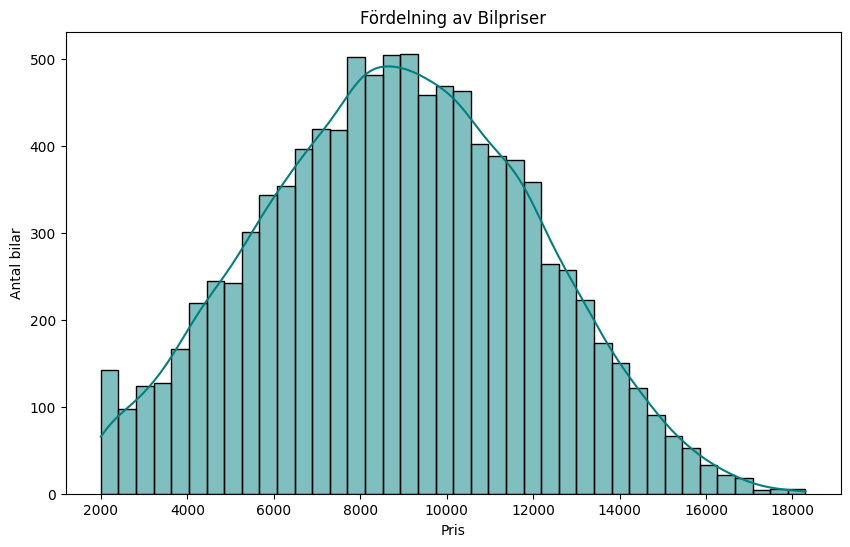

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(car_price_dataset_original['Price'], kde=True, color='teal')
plt.title('Fördelning av Bilpriser')
plt.xlabel('Pris')
plt.ylabel('Antal bilar')
plt.show()

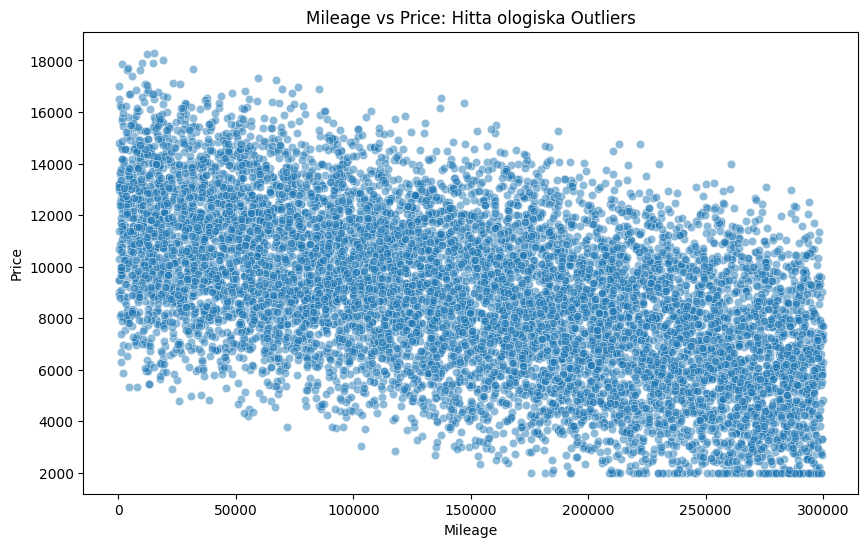

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Mileage', y='Price', data=car_price_dataset_original, alpha=0.5)
plt.title('Mileage vs Price: Hitta ologiska Outliers')
plt.show()

In [19]:
# Delar upp datan i X och y.
# y är det vi vill förutsäga (Price) och X är resten av funktionerna (i vårt fall alla andra kolumner)

# 1. Dela upp train_full (används ofta för sista kollen eller cross-validation)
X_train_full = train_full.drop(columns=['Price'])
y_train_full = train_full['Price']

# 2. Dela upp träningsdata (här lär sig modellerna)
X_train = train.drop(columns=['Price'])
y_train = train['Price']

# 3. Dela upp valideringsdata (för att jämföra dina 3 modeller)
X_val = val.drop(columns=['Price'])
y_val = val['Price']

# 4. Dela upp testdata (rörs först helt i slutet!)
X_test = test.drop(columns=['Price'])
y_test = test['Price']

In [20]:
print(f"Antal kolumner i X_train: {X_train.shape[1]}") # Bör vara 48 om du hade 49 totalt
print(f"Finns 'Price' kvar i X_train? {'Price' in X_train.columns}") # Bör vara False

Antal kolumner i X_train: 48
Finns 'Price' kvar i X_train? False


In [21]:
# Kollar dimensionerna är korrekta
print(X_train.shape)
print(y_train.shape)

(6000, 48)
(6000,)


In [22]:
# Funktion för att träna vår linjära regressionsmodell

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [36]:
# Träna en Random Forest Regressor

# 1. Inställningar för GridSearchCV
param_grid_rf = {
    'n_estimators': [1, 5, 10], 
    'max_features': [5, 10, 15, 50]}

# 2. Skapa basmodellen
rf_reg = RandomForestRegressor(random_state=40)

# 3. Skapa GridSearch
grid_search_rf = GridSearchCV(rf_reg, param_grid_rf, cv=5,
                              scoring='neg_root_mean_squared_error') 

# 4. Träna och ta tid
print("Tränar Random Forest via GridSearchCV...")
start_time = time.time()
grid_search_rf.fit(X_train, y_train)
print(f"Klar! Träningen tog {time.time() - start_time:.2f} sekunder.")

# 5. Spara den vinnande modellen
best_rf_model = grid_search_rf.best_estimator_

Tränar Random Forest via GridSearchCV...
Klar! Träningen tog 7.23 sekunder.


In [39]:
# Tränar en Gradient Boosting Regressor

# 1. Förbered parametrar för Gradient Boosting
# Här använder vi färre träd än RF eftersom varje träd är mer "effektivt"
param_grid_gb = {
    'n_estimators': [100, 150, 200],
    'learning_rate': [0.05, 0.1], # Hur stora steg modellen tar för att rätta fel
    'max_depth': [3, 4, 5],       # Vi håller träden grundare än i RF
    'subsample': [0.8, 1.0]       # Använder en del av datan per träd för att undvika overfitting
}

# 2. Skapa basmodellen
gb_reg = GradientBoostingRegressor(random_state=40)

# 3. Skapa GridSearch
# Vi använder cv=5 för att matcha dina tidigare modeller
grid_search_gb = GridSearchCV(gb_reg, param_grid_gb, cv=5,
                              scoring='neg_root_mean_squared_error',
                              n_jobs=-1,
                              verbose=1)

# 4. Tidtagning och träning
print("Tränar Gradient Boosting via GridSearchCV...")
start_time_gb = time.time()
grid_search_gb.fit(X_train, y_train)
end_time_gb = time.time()

# 5. Resultat
print(f"Klar! Träningen tog {end_time_gb - start_time_gb:.2f} sekunder.")
print(f"Bästa inställningar: {grid_search_gb.best_params_}")

# Spara den bästa modellen till senare
best_gb_model = grid_search_gb.best_estimator_

Tränar Gradient Boosting via GridSearchCV...
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Klar! Träningen tog 40.59 sekunder.
Bästa inställningar: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}


In [40]:
# 1. Låt alla tre modeller göra förutsägelser på valideringsdatan
lr_pred_val = lin_reg.predict(X_val)
rf_pred_val = best_rf_model.predict(X_val) # Vi använder den sparade 'best_rf_model'
gb_pred_val = best_gb_model.predict(X_val) # Vi använder den sparade 'best_gb_model'

# 2. Beräkna och skriv ut RMSE för varje modell
print('RMSE Linear Regression:', root_mean_squared_error(y_val, lr_pred_val))
print('RMSE Random Forest:', root_mean_squared_error(y_val, rf_pred_val))
print('RMSE Gradient Boosting:', root_mean_squared_error(y_val, gb_pred_val))

# 3. (Valfritt) Beräkna MAE för att se felet i faktiska kronor
from sklearn.metrics import mean_absolute_error
print('\n--- Genomsnittligt fel i EUR (MAE) ---')
print('MAE Linear Regression:', mean_absolute_error(y_val, lr_pred_val))
print('MAE Random Forest:', mean_absolute_error(y_val, rf_pred_val))
print('MAE Gradient Boosting:', mean_absolute_error(y_val, gb_pred_val))

RMSE Linear Regression: 84.85865572105753
RMSE Random Forest: 632.9223179624811
RMSE Gradient Boosting: 166.0529836011611

--- Genomsnittligt fel i EUR (MAE) ---
MAE Linear Regression: 20.3268924210695
MAE Random Forest: 508.33835
MAE Gradient Boosting: 129.56466229345594


--- De 10 viktigaste variablerna för priset ---
dmy_Electric          1988.386065
dmy_Semi-Automatic   -1494.854293
dmy_Manual           -1491.249697
Engine_Size            993.925106
dmy_Hybrid             991.185615
Year                   298.756533
dmy_5 Series            -9.070831
dmy_RAV4                 7.847026
dmy_Sportage            -6.382535
dmy_X5                  -6.128387
Name: Coefficient, dtype: float64


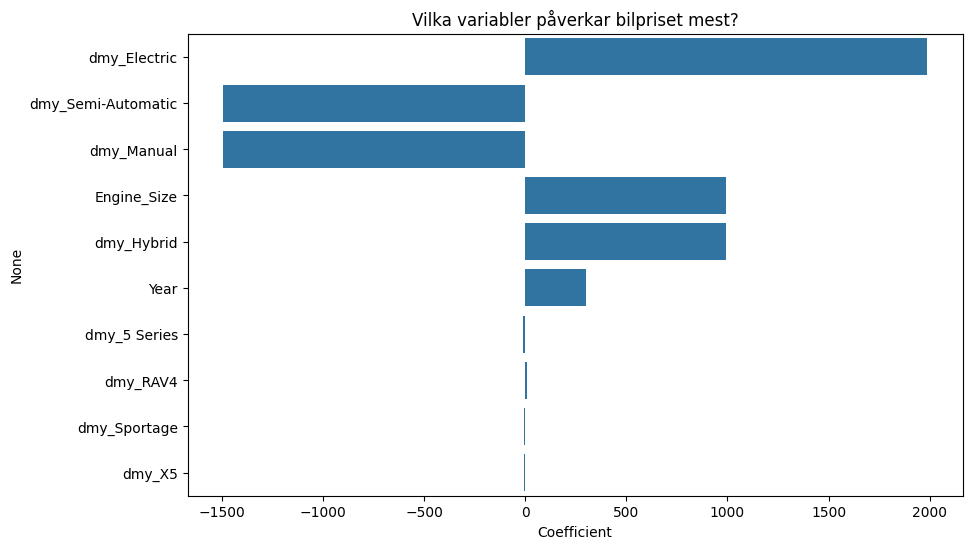

In [26]:
# 1. Hämta koefficienterna från din linjära modell
coefficients = pd.DataFrame(lin_reg.coef_, X_train.columns, columns=['Coefficient'])

# 2. Sortera dem efter absolutbelopp (så vi ser de mest kraftfulla, oavsett om de är + eller -)
coefficients['Abs_Coefficient'] = coefficients['Coefficient'].abs()
top_features = coefficients.sort_values(by='Abs_Coefficient', ascending=False).head(10)

# 3. Presentera resultatet
print("--- De 10 viktigaste variablerna för priset ---")
print(top_features['Coefficient'])

# 4. Enkel visualisering
plt.figure(figsize=(10, 6))
sns.barplot(x=top_features['Coefficient'], y=top_features.index)
plt.title('Vilka variabler påverkar bilpriset mest?')
plt.show()

In [27]:
# 1. Kolla genomsnittspriset på bilarna i valideringsdatan

mean_price = np.mean(y_val)
print(f"Medelpris på bilar: {mean_price:.2f} EUR")

# 2. Räkna ut det relativa felet för Linear Regression
relative_error = root_mean_squared_error(y_val, lr_pred_val) / mean_price
print(f"Relativt fel (RMSE / Medelpris): {relative_error:.4f}")

# 3. Gör om det till procent för att göra det ännu tydligare
print(f"Procentuellt fel: {relative_error * 100:.2f} %")

Medelpris på bilar: 8836.39 EUR
Relativt fel (RMSE / Medelpris): 0.0096
Procentuellt fel: 0.96 %


In [28]:
# 1. Slå ihop datan i EXAKT samma ordning
X_train_full = pd.concat([X_train, X_val])
y_train_full = pd.concat([y_train, y_val]) # Train först, sen Val - precis som i X!

# 2. Skapa och träna modellen
final_model = LinearRegression()
final_model.fit(X_train_full, y_train_full)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [29]:
# 4. NU kör du det sista testet på X_test
final_pred_test = final_model.predict(X_test)

In [30]:
# Räkna ut RMSE för testdatan
test_rmse = root_mean_squared_error(y_test, final_pred_test)

# Räkna ut relativt fel i procent
test_rel_error = (test_rmse / np.mean(y_test)) * 100

print(f"Slutgiltigt RMSE på TEST-DATA: {test_rmse:.2f} EUR")
print(f"Slutgiltigt procentuellt fel: {test_rel_error:.2f} %")

Slutgiltigt RMSE på TEST-DATA: 109.93 EUR
Slutgiltigt procentuellt fel: 1.23 %
